# Домашняя работа по регуляризации и оптимизации

Ниже приводится корпус данных с двумя метками: 1 и -1. К данным применяется линейная модель классификации:

$f(x, \theta) = x_1 \theta_1 + x_2 \theta_2 + \theta_3.$

Предлагается подобрать параметры $\theta$ минимизируя следующую функцию ошибки:

$\mathcal{L}(\theta) = 0.1 (\theta_1^2 + \theta_2^2) + \frac{1}{N}\sum\limits_{i=1}^N \max(0, 1 - y_i f(x_i, \theta)).$

Для оптимизации предлагается использовать метод градиентного спуска с 1000 шагами размера $0.1$ из начальной точки $(1, 1, 0)$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import yaml

In [2]:
X = np.array([
    [0, 1],
    [1, 1],
    [1, 0],
    [-0.5, 0.5],
    [0, -0.5]
])

y = np.array([1, 1, 1, -1, -1])

theta0 = np.array([1.0, 1.0, 0.0])

lr = 0.1

def f(X, theta):
    theta = np.asarray(theta)
    return (X * theta[:2]).sum(axis=-1) + theta[2]

def loss(X, y, theta):
    theta = np.asarray(theta)
    norm = (theta[:2] ** 2).sum()
    deltas = y * f(X, theta)
    return 0.1 * norm + np.mean(np.maximum(0, 1 - deltas))

def grad(X, y, theta):
    g = np.zeros(3)
    g[:2] = 0.2*theta[:2]
    deltas = y * f(X, theta)
    maxes = np.maximum(0, 1 - deltas)
    for i in range(2):
        g[i] += np.sum(-X[maxes>0, i]*y[maxes>0])/X.shape[0]
    g[2] += np.sum(-y[maxes>0] )/X.shape[0]
    return g

print("Prediction:", f(X, theta0))
print("Loss:", loss(X, y, theta0))

Prediction: [ 1.   2.   1.   0.  -0.5]
Loss: 0.5


In [3]:
# Ваш код оптимизации.
theta = theta0
lr=0.1
max_step = 1000
losses = []
thetas = []
for i in range(max_step):
    theta = theta - lr*grad(X, y, theta)
    thetas.append(theta)
    losses.append(loss(X, y, theta))

In [4]:
thetas = np.array(thetas)

In [5]:
theta

array([ 1.49999998,  1.        , -0.5       ])

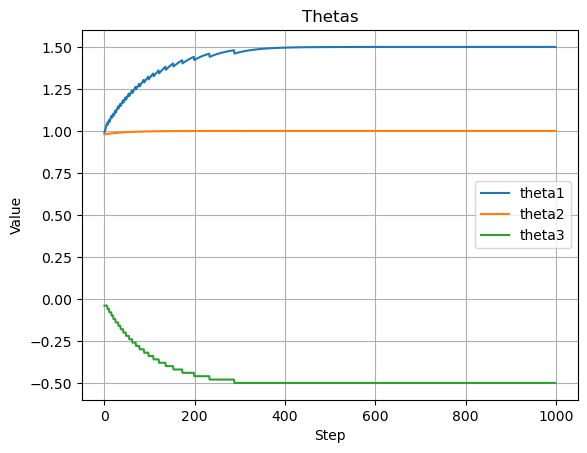

In [6]:
plt.plot(thetas[:, 0], label='theta1')
plt.plot(thetas[:, 1], label='theta2')
plt.plot(thetas[:, 2], label='theta3')
plt.grid()
plt.legend()
plt.title('Thetas')
plt.xlabel('Step')
plt.ylabel('Value');

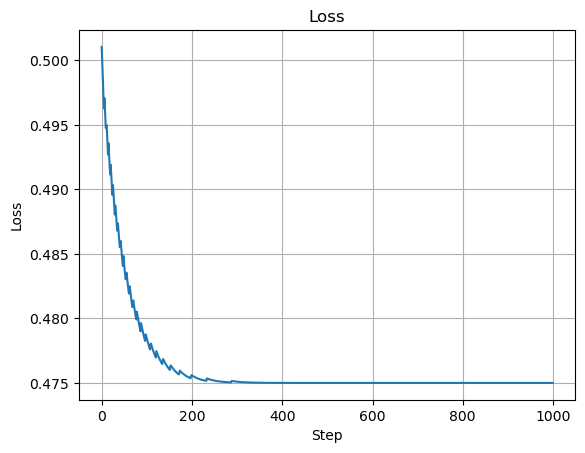

In [7]:
plt.plot(losses)
plt.grid()
plt.title('Loss')
plt.xlabel('Step')
plt.ylabel('Loss');

In [8]:
print("Prediction:", f(X, theta))
print("Loss:", loss(X, y, theta))

with open("submission.yaml", "w") as fp:
    yaml.safe_dump({"tasks": [{"task1": {"answer": theta.tolist()}}]}, fp)

Prediction: [ 0.5         1.99999998  0.99999998 -0.74999999 -1.        ]
Loss: 0.4750000000000001


In [9]:
def f_m(X, Y, theta):
    return theta[0]*X + theta[1]*Y + theta[2]

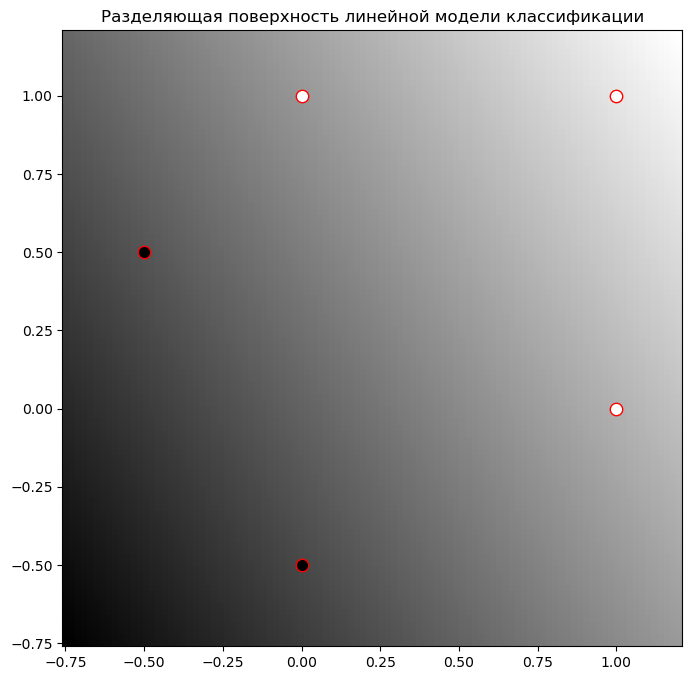

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=100)

x_m = np.linspace(-0.75, 1.2, 100)
y_m = np.linspace(-0.75, 1.2, 100)

X_m, Y_m = np.meshgrid(x_m, y_m)
Z_m = f_m(X_m,Y_m,theta)#np.sin(np.sqrt(X**2 + Y**2))

plt.pcolormesh(X_m, Y_m, Z_m, cmap='gray', shading='auto')
plt.scatter(X[y==-1, 0], X[y==-1, 1], s=80, c='black', edgecolors='red')
plt.scatter(X[y==1, 0], X[y==1, 1], s=80, c='white', edgecolors='red');
plt.title('Разделяющая поверхность линейной модели классификации');